<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   eventLength              1000 non-null   int64  
 1   eventVersion             1000 non-null   int64  
 2   eventType                1000 non-null   int64  
 3   sequence                 1000 non-null   int64  
 4   manufacturer             1000 non-null   int64  
 5   sw                       1000 non-null   int64  
 6   hw                       1000 non-null   int64  
 7   deviceMajorId            1000 non-null   int64  
 8   deviceMinorId            1000 non-null   object 
 9   battery                  1000 non-null   float64
 10  wakeTime                 1000 non-null   int64  
 11  imei                     1000 non-null   int64  
 12  cellId                   1000 non-null   object 
 13  ecl                      1000 non-null   int64  
 14  rssi                     

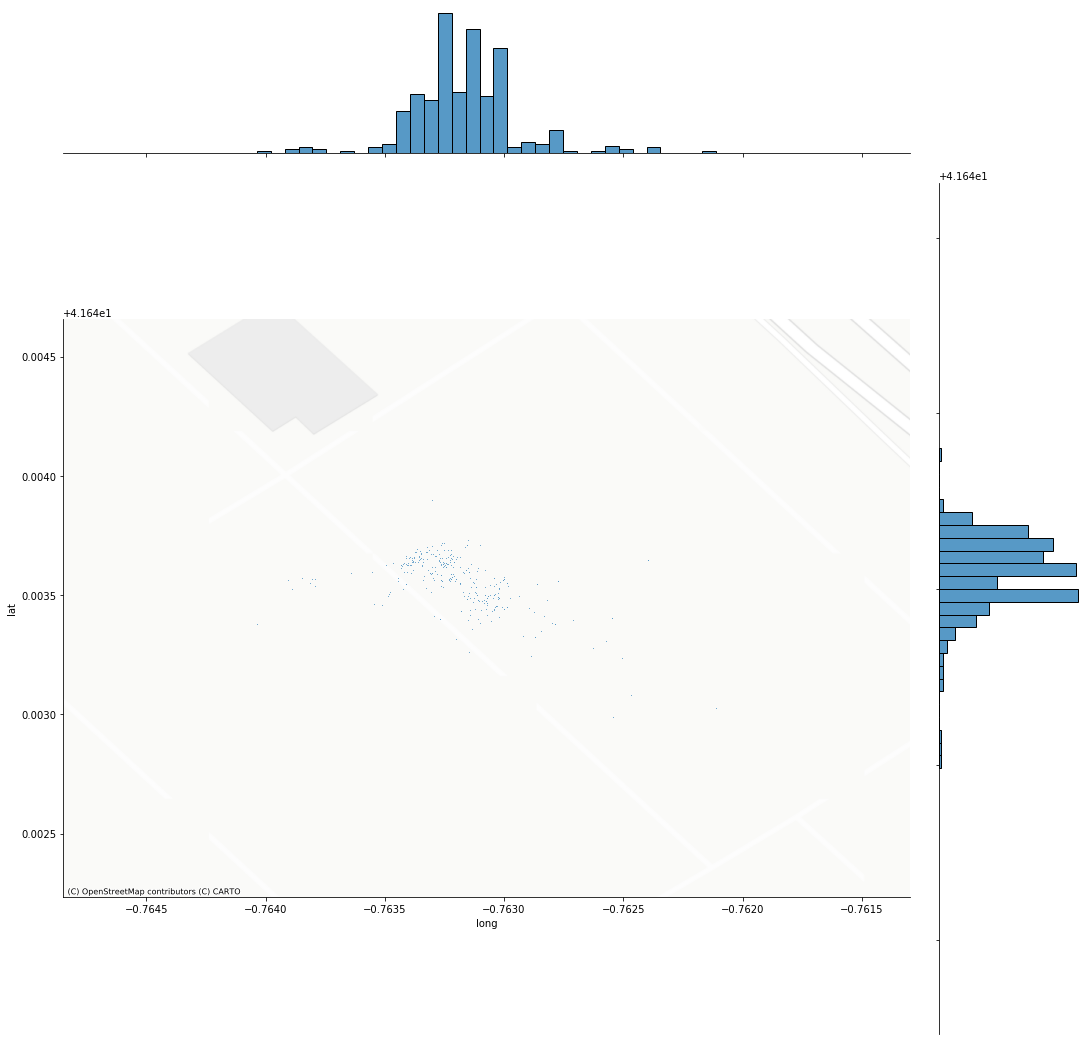

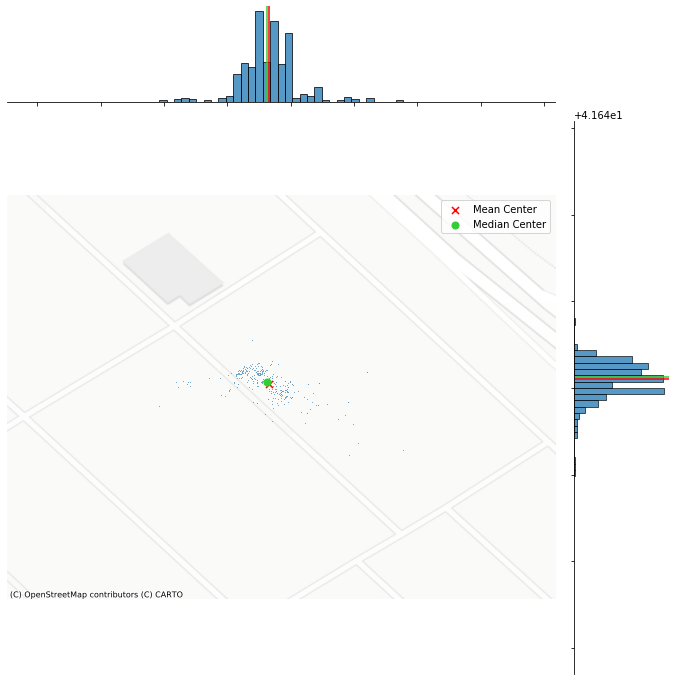

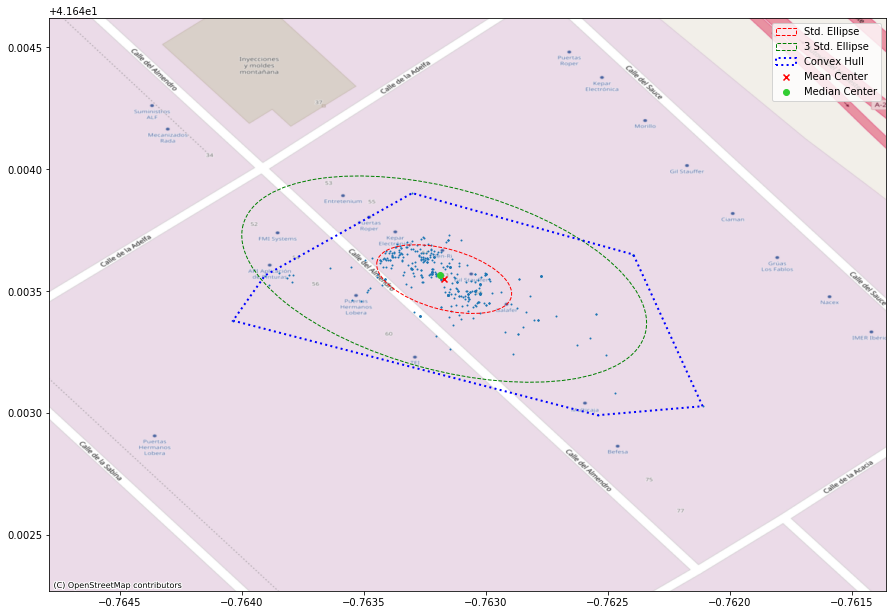

In [8]:
%matplotlib inline

import numpy
import pandas
import geopandas
import libpysal as ps
import seaborn
import contextily
import pointpats
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from pointpats import centrography
from matplotlib.patches import Ellipse
from matplotlib.patches import Polygon, Circle, Rectangle
from descartes import PolygonPatch


db = pandas.read_csv('tramas_export_1644257289215.csv')

db['lng'] = db['longitude'].where(db['ns'] == 'S', -1*db['longitude'])
db['lat'] = db['latitude'].where(db['ew'] == 'W', -1*db['latitude'])

db.info()
has_location =  db['eventLength']>77
loc_db = db[has_location]



# Generate scatter plot
# seaborn.jointplot(x='lng', y='lat', data=loc_db, s=0.5);

# Generate scatter plot
joint_axes = seaborn.jointplot(
    x='lng', y='lat', data=loc_db, s=1, height=15
)
contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronNoLabels
);

mean_center = centrography.mean_center(loc_db[['lng', 'lat']])
med_center = centrography.euclidean_median(loc_db[['lng', 'lat']])

# Generate scatter plot
joint_axes = seaborn.jointplot(
    x='lng', y='lat', data=loc_db, s=1, height=10
)
# Add mean point and marginal lines
joint_axes.ax_joint.scatter(
    *mean_center, color='red', marker='x', s=50, label='Mean Center'
)
joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')
# Add median point and marginal lines
joint_axes.ax_joint.scatter(
    *med_center, color='limegreen', marker='o', s=50, label='Median Center'
)
joint_axes.ax_marg_x.axvline(med_center[0], color='limegreen')
joint_axes.ax_marg_y.axhline(med_center[1], color='limegreen')
# Legend
joint_axes.ax_joint.legend()
# Add basemap
contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronNoLabels
)
# Clean axes
joint_axes.ax_joint.set_axis_off()
# Display
plt.show()


coordinates = loc_db[['lng','lat']].values
# print(coordinates)

convex_hull_vertices = centrography.hull(coordinates)
#(radius, center), inset, removed, constraints = pointpats.skyum(coordinates)
#(center_x, center_y), radius = centrography.minimum_bounding_circle(coordinates)

major, minor, rotation = centrography.ellipse(loc_db[['lng','lat']])
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(15, 15))
# Plot photograph points
ax.scatter(loc_db['lng'], loc_db['lat'], s=1)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = 180-numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', linestyle='--',
                  label='Std. Ellipse')
ax.add_patch(ellipse)

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=3*major*2, # centrography.ellipse only gives half the axis
                  height=3*minor*2, 
                  angle = 180-numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='green', linestyle='--',
                  label='3 Std. Ellipse')
ax.add_patch(ellipse)

# add a blue convex hull
ax.add_patch(
    plt.Polygon(
        convex_hull_vertices, 
        closed=True, 
        edgecolor='blue', 
        facecolor='none', 
        linestyle=':', 
        linewidth=2,
        label='Convex Hull'
    )
)
# and a red minimum bounding circle
# circ_patch = Circle(
#     (center_x, center_y), 
#     radius=radius,
#     edgecolor='red', 
#     facecolor='none', 
#     linewidth=2,
#     label='Min Bounding Circle'
# )
ax.legend()
# Display
# Add basemap
contextily.add_basemap(
    ax,
    crs="EPSG:4326",
    source= contextily.providers.OpenStreetMap.Mapnik
)
plt.show()

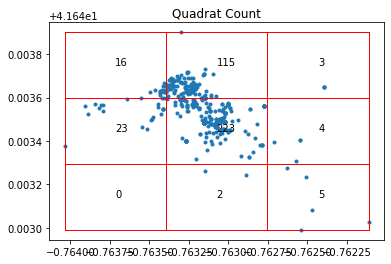

In [7]:
qstat = pointpats.QStatistic(coordinates)
qstat.plot()

In [10]:
loc_db

,eventLength,eventVersion,eventType,sequence,manufacturer,sw,hw,deviceMajorId,deviceMinorId,battery,...,satellites,hdop,rawEvent,incidenceId,eventDate,isDGTNotificated,manufacturerId,deviceId,long,lat
260,125,1,2,4,1,9,2,0,00E8,5.2,...,6,1.43,MTI1MDAxMjAwNDAwMDEwOTAyMDAwMDAwRTg1MjAwNzg2OT...,37780,2022-01-18T08:23:42Z,0,NaN,232,-0.762395,41.643649
261,125,1,1,3,1,9,2,0,00E8,5.2,...,6,1.43,MTI1MDAxMTAwMzAwMDEwOTAyMDAwMDAwRTg1MjAwNjg2OT...,37780,2022-01-18T08:22:13Z,0,NaN,232,-0.762395,41.643649
262,125,1,1,2,1,9,2,0,00E8,5.2,...,6,1.43,MTI1MDAxMTAwMjAwMDEwOTAyMDAwMDAwRTg1MjAwNDg2OT...,37780,2022-01-18T08:20:42Z,0,NaN,232,-0.762395,41.643649
297,92,1,2,1,1,6,1,0,100,6.2,...,5,1.50,XAECAQEAYQAAZAA+AQAAODY5MTU0MDQwMDI3MTMzPYiZD7...,37774,2022-01-05T11:15:22Z,0,NaN,256,-0.762889,41.643243
299,92,1,2,3,1,6,1,0,100,5.2,...,4,2.96,XAECAwEAYQAAZAA0BAAAODY5MTU0MDQwMDI3MTMzPWiYD7...,37773,2022-01-05T11:07:06Z,0,NaN,256,-0.762870,41.643324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,92,1,1,2,1,7,2,0,219,4.6,...,5,1.59,XAEBAgEAcgAA2wAuAwAAODY5MTU0MDQwMDU2Mzk3PWiYD8...,37689,2021-12-13T13:09:40Z,0,NaN,537,-0.763888,41.643526
995,92,1,1,2,1,8,2,0,229,5.3,...,6,1.45,XAEBAgEAggAA5QA1AwAAODY5MTU0MDQwMTEwMDM4PYiZD7...,37684,2021-12-13T13:09:37Z,0,NaN,553,-0.763119,41.643536
996,92,1,1,2,1,7,2,0,214,4.8,...,4,1.33,XAEBAgEAcgAA1gAwAwAAODY5MTU0MDQwMDY4OTcwPYiZD8...,37688,2021-12-13T13:09:30Z,0,NaN,532,-0.763096,41.643436
997,92,1,1,2,1,8,2,0,230,5.4,...,5,1.69,XAEBAgEAggAA5gA2AwAAODY5MTU0MDQwMDYwMjgyPYiZT8...,37687,2021-12-13T13:09:30Z,0,NaN,560,-0.762982,41.643540
